![alt text](https://lh3.googleusercontent.com/mGALiw3UcWAAx_YcN6yePVK0QEtnB8BznpBjWSjauExjQtJB8R6o9Loi7BzfpC5p0xu3ZhghjnZNSFZBFUhIoW6RLaOxA8S_vmVbt_5v9R_fHqiY8dy_C7G6hF_UTsO-6HnZzcGdtBu-ITY2QpkIKBcFKZDKqeytt9Vyz62djDJUwW9oNvCz247OHGl_XS2ddMc6qzORkCaFnBTBqNJTirT3OlwbwR_eWoYC5RbZf341euii5TdBxpyyGN05EYdjowpHLIB4XTI6PUeDlazjRA6RUvHn62bcN6jw2jBLWXJHjsT4V6-sngQh7aglK9PRCoUhLbAc2N4B1oerznIySsVLeguaeNmvBWQMogueDjfjqAuefBnnGS4YehOYH0GVJJb_uGg4MgoEhl2Y5al9t7D83233r-_5YWbzMH_wJbD8fis6gXsCS3fGeCdiD0-UxJTXwWqidtMKkRUYW3h0BDicppdAc5deK5i9rvCJg-E7erJOXzzfEhIVWtrnvr7b-3F6q52N_DFxV3FTcB6ifmI_Xtnc3z8D122LiQPuKqTOTRl-LK_lZSVwBqshgnAQawmc4a74570ijgILloTgDYBjVcsGUE8N_lVcTBjK5joFQfL1ftVFuk9_TktzeCfHReFVGdor2_KmhtsiTUHCF88qaV_YdY2WXY9-hxXBlQIp6iJrq1Otn4bPR7HaMsv8GlpiIRReHKS6mgvyDHhqnRW9=w1007-h119-no "GIS for Professionals")

# Introduction to batch processing and GIS automation using Jupyter Notebooks


This notebook was created by [Damien Mansell](http://geography.exeter.ac.uk/staff/index.php?web_id=Damien_Mansell) if you find have any questions or feedabck please get in touch. Impact is important to my work so please let me know if any of it has been useful. Many thanks

### Introduction to the notebook

Thhis Jupyter Notebook contains the practical worksheet and code steps which  Iintroduced into a University of Exeter GIS course [GIS for Professionals](http://geography.exeter.ac.uk/currentstudents/modules/description/index.php?moduleCode=GEO3239&ay=2019/0)

The notebook has been asapted slightly for the Esri UK user conference demonstration and publication on Git hub. It provides an example of ArcGIS API for python and ArcPy plus some of the added benefits of using Jupyter Notebooks for your workflow.

This notebook contains txt cells like this one, and ones containing code like the one below. When the code cells are run the outputs are displayed in the notbook.

Go ahead and text this out by running the code cell below (play button above or ctrl+ return)

In [1]:
#code cell example simple arithmatic in python
1+1

2

In [21]:
print("hello Esri UK")

hello Esri UK


### Introduction to the practical & tasks

In this practical you will develop understanding of python, how you can write code to automate tasks and perform batch processing, understand the benefit of python by utilising python packages and modules and develop understanding of designing efficient work flows as GIS professionals.

Through the practical there will be tasks for you to stop, question and reflect. This is such an important learning step and so I encourage discussion and for you to ask questions.

We will be using Jupyter to create a notebook that contain these instructions, interactive-python boxes and outputs. We will use our existing ArcGIS Pro licenses to call in Arcpy modules. Our task is to calculate the changing distance of an object through time, in this case the position of an ice front to calculate ice front retreat rates. This is quite a trivial task in ArcGIS, however the complication of this workflow is that the distance calculated is not a straight line Euclidean distance but along a curved transect. For an ice front it is import to capture retreat along a flow line rather than the straight line distance. It is also important to capture asynchronous retreat, i.e. the retreat across the ice front and not just the centreline. To do the later multiple transect lines could be used. However, using multiple transect lines and hundreds of ice front positions will require thousands of calculations which will be far too time consuming to perform manually. Even parameterising the transect lines and digitised ice front positions to calculate location for each ice front will take a considerable amount of work. Then there comes the task of combining this dataset. We will do all of this and create a workflow and code that allows us to easily apply it to other ice fronts or update our requirements such as new measurements or transect lines.


### Introduction to the study area

You will be provided with ice front position data for Columbia glacier, Alaska. This glacier has undergone significant retreat. Ice front positions from Sentinel 2 and Landsat have been digitised for you (thanks to Dan Hansel UG dissertation project). You will need to calculate the retreat of this glacier.

#### Note:
Glacier retreat can be asynchronous, i.e. you will need a width average measurement.
Retreat must be measured along a flow line i.e. **not** a straight line distance.



<div class ="alert alert-block alert-success"> • First we will sue Arc GIS python API to understand the study area:

In [2]:
from arcgis.gis import GIS
#agol = GIS()
gis = GIS()


In [3]:
#search in arcgis online for a columbia glacier webmap
webmap_search = gis.content.search(query = "Columbia Glacier Alaska Inventory")
webmap_search

[<Item title:"Columbia Glacier Alaska Inventory" type:Web Map owner:dtm202_uoe>,
 <Item title:"GEFS_wtelands_marshes_only" type:Feature Layer Collection owner:epd_llc>,
 <Item title:"Alaska Glacier Inventory (RGI)" type:Feature Layer Collection owner:SEAKGIS>]

You should have found a Columbia Glacier invenotry webmap published by dtm202 - who is this? Is it form a trustworthy source?

In [4]:
from IPython.display import display
user = gis.users.get('dtm202_uoe')
user

<User username:dtm202_uoe>

In [5]:
# set the first webmap from the search as a webmap you can call into this notebook
webmap = webmap_search[0]
webmap

<Item title:"Columbia Glacier Alaska Inventory" type:Web Map owner:dtm202_uoe>

In [6]:
# now call the webmap to produce a map widget
from arcgis.mapping import WebMap
AlaskaGlaciers = WebMap(webmap)
AlaskaGlaciers

Explore the map widget. Zoom in and out of the map to change the basemap imagery. If you are familiar with Esri basemap imagery yo uwill know the images are not from the same timeperiod but mosaiced. By zooming in the basemap changes to a more recent image where the glacier is significantly further up the fjord. Hopefully you have identified for yourself that the basemap imagery shows the glacier at a different position ot the inventory implying it is a fast retreating glacier, or the inventory need updating at least. We should update it and measure recent changes.....

### Task 1: Thinking about workflow and outputs
Visualise the entire work flow from digitising transects to producing a table of ice front retreat positions.
- What data will you need?
- What data will you need to generate?
- What data types will you need to use for the script ingredients?
- What output and data do you aspire to generate?

When you have come up with a list run the cell below by cliking shift and return. It will run a python script that contains my list. Make sure though you first **take the time to think about the answer before running the code**.

In [7]:
run task1.py

Task 1 :

What data will you need?
Answer:
Transects to measure the distances
Files of ice front positions (digitised imagery or historic maps)

What data will you need to generate?
Answer:
For every digitised ice front a file containg the transect lengths to the distance of the ice-front
The transect lines will be  specific lengths to the ice front position for that scene, so will need metadata including the time of year
Table including the lengths of the transect lines, ideally for each transect line
Summary column containing the average ice length of the transects across the width iof the ice front.

What data types will you need to use for the script ingredients?
Answer:
list fo shapefiles

What outputs do you aspire to generate?
Answer:
Table containing rows of dates and columns of measuremnts to plot ice front positon graphs


You just ran a script in the Jupyter notebook window! I wrote a script to simply print out the questions and the answers. Jupyter notebooks are capable of running scripts but there real benefit is using the code cells to write the code and you can view the output straight away. By having code cells in a notebook in a particular order it is effectively like running a script. All the code cells are in the Jupyter notebook so when you run the entire notebook you effectively run a script.

### Task 2: Viewing the data
Now you have visualised the workflow from *inputs* to *outputs* let’s have a look at the data and then the tasks and analysis steps may become clearer.

Download the **IceFrontPositions.gdb** geodatabase. It contains shapefiles from 2015-2018 digitised from Sentinel 2 views (S2V) and Panchromatic Landsat (PSL). Similar to the screen shot below.



![alt text](https://lh3.googleusercontent.com/28Qhh81i8HKVVSPXdV7Gw9Nv6rLrp-zchzo0u5zWx1My0aOFLzWKQfgP_RE-aa_7YuKyRYg84ZyzilZwJ1HUU6D6uupcwEW3FD8KGtLJW29chsnh7WeHKoQdiRDbVsxbpmVoCmHmtAJ0jSgaZNsZvgnrz6ZTZhVHBInZkN_-_Wd2RUQ2ruj3e9bIQWZnebhR_IAY3nqdRwThMEDCfJgb5wj8rQowdUvZhBcqisYb959pPALCADrMkb8YphLBSjYy21ULYtejCNjJUZbyPHKFytvPTJJ835wmglGfn-OojDlSIFX7r9ZJFPoryKvUA7cX0ScN40FL4mQpdN21LmmiLgus1yeLLqGmSXxW7l8gRNNDrC7VdpEXPQQ90V6q79BlE-mOQfQlOfeyFcnu4X8Tr_RTdZHcgp4DD8T9oUjnGx-4wCZtW5UdNtQg2qgWeVI9fU3it2VaMadWkxZJcHixM6yks9E4WkDrHaZg2QdIwJKWNNcIU_KOrKSmWPwa8AzLYHkZF_VeBPMpnPkK-X262XytAmLM31gvroGRZLKrhtAv4cy1VcjC1XMbPA9IQTglz_pWHlFfdh-hiJyppyuEKO3pNquokFlnA_zPMo6AYeTvJogBDSzGA4l279JqTsXoH4hOK0edrA6RVOf2sXHet1V34ihdnx3RqbWn-hyQFTg0jowMeSdtnSXycBMb5V6KyPxMnoRYSmgf6kMbli7dMTxT=w1822-h905-no "Columbia Glacier Shapefiles")



**Dan Hansel, (2019 University of Exeter Geography with Applied GIS student)** has digitised the ice fronts as polygons with the reference edge in the fjord. We can therefore measure the distance along a profile from the reference (straight line edge) to the digitised ice front for each shapefile. (Dan did this by clipping a polygon shapefile which extends up glacier to the ice front position for each shapefile). 

Note we will need a transect file containing multiple transect across the ice front in order to measure a width averaged position. *E.g see a figure from my own research on Kronebreen, Svalbard.*


![alt text](https://lh3.googleusercontent.com/h_-t2bdzBA1hAYUFf-n-v3Kr0oT5ZdEc_IrUYcTfo5ilzI8WHCu8PXLiWLL-myuQHP3zFv8l1I5H9jtC1JLuMp67t8bO_Em_OGS7FRB-lZeU8XogflE9gaXmeqj6rO_xe1WnVoqg4QJZfGym5vlUZKs0DNG1BbXEExmcYVKVyR9l1qf7YXw0nHvQ2P87_cQiPnIBIKjHetFR8Sut-KmqX4Za7xyrqnnL5ZZkuYdf5NRFqyaJZzu9wspvJffTgM09RbEQTeXBSHMHO_1adgeClNQ0PSjL3Bse_bKNwI38BqE3Y1EPfU94ab4Opt-MhIHwsVhydi4LIRXoPgt8Ot5gZb2a9IPUK8otPm6c_uKOUm3e-4S13XM7zTL6dhi-bDpWIxjsDFLjcipETvP0-5aqwGc1B-fCkaAvdl6p2FSU6QsTktfrSU0ROKZXzr2XZyxb5SaVfDh-8qxbdx0cmaekVD-Y7idAIugwLnVxAmwc1ypRW1sMD4-sslioVUo4MbCPhFYtIji3W2pplgT_3Em0J2NLzrxseAkBHBdwCl_gS76eVLin6A2rX5kGcWAr-dHh_q1QEAVgW9q04yOLXYBhu3eIKH2LmIbvICOdU42p9aofVc4HRQSErrbfM2EhavWs5Enz3-l3tH_j4zaaWVwVhn9yGn_EMFziR6NDMp9VAf7JiEN-pNroQB5JvCQMZhLIu1BS7Ya8gk-pRt_Fsw=w1280-h720-no "Clipped Transects")


**Make a note of the location of your files** as we will now create a workflow to clip the transects to each shapefile extent and then create a spreadsheet of distances for each transect line, for each shapefile.

We will perform this batch processing here, in a Jupyter Notebook - our chosen IDE.

Why would we use an IDE such as Jupyter notebooks or SPYDER? Have a think and try to answer the following question.

Which scripting environment might be more beneficial to use when developing and writing scripts?
- ArcGIS python window
- An IDE like Jupyter, PyCharm or SPYDER
(Run the next cell for the answer)

Run the code cell below for my answer.


In [8]:
run answer1.py

Question1 :
Which scripting environment might be more beneficial to use when developing and writing scripts?

Answer:
In this case an IDE like Jupyter notebooks may be more beneficial because it provides more functionality for editing scripts


We will need to use ArcGIS tools to create our workflow so next import arcpy into our IDE:

In [9]:
import arcpy
import os

Edit the folder path below to the lcoation of the directory containg the IceFrontPositions.gdb

**note - change the path to where the files are located on your machine - make note of the double "//" for directories**

In [10]:
folder_path = "C:\\LocalData\\GEO3239\\IceFrontDemo"
print(folder_path)

C:\LocalData\GEO3239\IceFrontDemo


Edit the following code cells by specifying where your Columbia Glacier files are located, then run the code and ensure there are no syntax errors and the code has run correctly.

In [11]:
#where are your Columbia Glacier Shapefiles located = name the gdb
in_gdb = "IceFrontPositions.gdb"
print(folder_path+"\\"+in_gdb)

C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb


Next we will define our workspace path using the infile we defined earlier and adding the geodatabse extntsion: Run the cell and check the printed path looks accurate:

In [12]:
infile = folder_path + "\\" + in_gdb

#sets the workspace - ensure you change this to your workspace and point to a geodatabase.
arcpy.env.workspace = infile
print(infile)

C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb


In order to perform batch processing over multiple files we will need to list all the files in your directory and work with these. To do that we will call the features into a list. The next block of code does this, for a full explanation see the [List feature class help](http://pro.arcgis.com/en/pro-app/arcpy/functions/listfeatureclasses.htm)

To demonstrate first we will simply print the name of each file:

In [13]:
#list fc and ds and copy to new gdb
featureclasses = arcpy.ListFeatureClasses()

for fc in featureclasses:
    path = os.path.join(arcpy.env.workspace, fc)
    print("path ="+path)

path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_19102017
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_01112017
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_08112017
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_13112017
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_18112017
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_23112017
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_01022018
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_04022018
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_09022018
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_01032018
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_21032018
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_23032018
path =C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb\S2V_26032018
path =C:\LocalData\GEO323

That is a lot of files! Good job we are automating this!

### Task 6: Clip the trasect lines to ice front extent

The next step in the workflow is to **clip** the transect lines to the extent of the icefront margin which we have digitised. An example is shown below with the digitised polygon in yellow and the Transect file clipped to the polygon.

![alt text](https://lh3.googleusercontent.com/h_-t2bdzBA1hAYUFf-n-v3Kr0oT5ZdEc_IrUYcTfo5ilzI8WHCu8PXLiWLL-myuQHP3zFv8l1I5H9jtC1JLuMp67t8bO_Em_OGS7FRB-lZeU8XogflE9gaXmeqj6rO_xe1WnVoqg4QJZfGym5vlUZKs0DNG1BbXEExmcYVKVyR9l1qf7YXw0nHvQ2P87_cQiPnIBIKjHetFR8Sut-KmqX4Za7xyrqnnL5ZZkuYdf5NRFqyaJZzu9wspvJffTgM09RbEQTeXBSHMHO_1adgeClNQ0PSjL3Bse_bKNwI38BqE3Y1EPfU94ab4Opt-MhIHwsVhydi4LIRXoPgt8Ot5gZb2a9IPUK8otPm6c_uKOUm3e-4S13XM7zTL6dhi-bDpWIxjsDFLjcipETvP0-5aqwGc1B-fCkaAvdl6p2FSU6QsTktfrSU0ROKZXzr2XZyxb5SaVfDh-8qxbdx0cmaekVD-Y7idAIugwLnVxAmwc1ypRW1sMD4-sslioVUo4MbCPhFYtIji3W2pplgT_3Em0J2NLzrxseAkBHBdwCl_gS76eVLin6A2rX5kGcWAr-dHh_q1QEAVgW9q04yOLXYBhu3eIKH2LmIbvICOdU42p9aofVc4HRQSErrbfM2EhavWs5Enz3-l3tH_j4zaaWVwVhn9yGn_EMFziR6NDMp9VAf7JiEN-pNroQB5JvCQMZhLIu1BS7Ya8gk-pRt_Fsw=w1280-h720-no "Clipped Transects")

The clip tool requires the following inputs and outputs to be defined:

- in_features - our **Transects** shapefile
- clip_features - a **polygon** digitised to the extent of a nice front for a given time step
- out_feature_class - output location and name
- {cluster_tolerance}) - we will set this to none

See the [clip help pages for full explantion](http://pro.arcgis.com/en/pro-app/tool-reference/analysis/clip.htm)

Since we will be running this for multiple files we will run a **for loop** in order to perform the clip over numerous files.

For the output file we will create a new gdb (**if** it doesn't exist already) and the name of the file will be the same as the input but with clip concatinated to the end.

We need to first make sure we have the trasects file. It is located in the IceFrontPositions.gdb.

In [14]:
print(in_gdb)

IceFrontPositions.gdb


In [15]:
print(infile)

C:\LocalData\GEO3239\IceFrontDemo\IceFrontPositions.gdb


In [16]:
#infile = folder_path + "\\" + in_gdb

out_gdb = "Batch_icefronts.gdb"
outfile = folder_path + "\\" + out_gdb
print(outfile)


#specify new gdb
arcpy.env.workspace = infile
outclip_gdb = "clipped_icefronts.gdb"
outclip = folder_path + "\\" + outclip_gdb

#if new clipped out file gdb does not exist then Execute CreateFileGDB
if arcpy.Exists(outclip):
    print(outclip + " exists")
else:
    arcpy.CreateFileGDB_management(folder_path, outclip_gdb)
    print("create new file " + outclip)

#list fc and ds and copy to new gdb
featureclasses = arcpy.ListFeatureClasses()
print(featureclasses)
for fc in featureclasses:
    path = os.path.join(arcpy.env.workspace, fc)
    #don't run the script on the Transects file
    if fc=="Transects":
        print("fc="+fc+"so don't run the script on this file")
    else:
        if arcpy.Exists(os.path.join(outclip,
                                     os.path.splitext(fc)[0])):
            print(os.path.splitext(fc)[0] + " file exists")
        else:
            arcpy.analysis.Clip(
                "Transects", os.path.join(infile,
                                          os.path.splitext(fc)[0]), os.path.join(outclip,
                                            os.path.splitext(fc)[0]), None)
            print(os.path.splitext(fc)[0])
#print file locations
print("file outputs are in "+outclip)

C:\LocalData\GEO3239\IceFrontDemo\Batch_icefronts.gdb
C:\LocalData\GEO3239\IceFrontDemo\clipped_icefronts.gdb exists
['S2V_19102017', 'S2V_01112017', 'S2V_08112017', 'S2V_13112017', 'S2V_18112017', 'S2V_23112017', 'S2V_01022018', 'S2V_04022018', 'S2V_09022018', 'S2V_01032018', 'S2V_21032018', 'S2V_23032018', 'S2V_26032018', 'S2V_28032018', 'S2V_31032018', 'S2V_02042018', 'S2V_05042018', 'S2V_12042018', 'S2V_15042018', 'S2V_07052018', 'S2V_07042018', 'S2V_04062018', 'S2V_06062018', 'S2V_01062018', 'S2V_14062018', 'S2V_01072018', 'S2V_09062018', 'S2V_19072018', 'S2V_21072018', 'S2V_31072018', 'S2V_06072018', 'S2V_02092018', 'S2V_28082018', 'S2V_04092018', 'S2V_09092018', 'S2V_12092018', 'S2V_14092018', 'S2V_17092018', 'S2V_29092018', 'S2V_07102018', 'PSL_01012015', 'PSL_02022015', 'PSL_22032015', 'PSL_23042015', 'PSL_25052015', 'PSL_13082015', 'PSL_30092015', 'PSL_17112015', 'PSL_27052016', 'PSL_28062016', 'PSL_31082016', 'PSL_03112016', 'PSL_19112016', 'PSL_05122106', 'PSL_06012017', 'P

### Task 7: Edit name field


Next we need to edit the name of the filed of the table so that is contains the date (the name of the file in the table).
To do this we will perform three steps
- add a new field
- change the field value to the name of the field
Later when we merge the data tables we will then know what date the transect lengths are referring to. We will use [Alter field in the data management toolbox](http://pro.arcgis.com/en/pro-app/tool-reference/data-management/alter-field-properties.htm)

In [17]:
#creates new field
arcpy.env.workspace = outclip

featureclasses = arcpy.ListFeatureClasses()
print("file outputs are in "+outclip)
for fc in featureclasses:
    path = os.path.join(arcpy.env.workspace, fc)
    inFeatures = os.path.splitext(fc)[0]
    fieldName1 = "Name" #os.path.splitext(fc)[0]
    fieldPrecision = 22
    fieldAlias = "Name"
    fieldLength = 100
    Name = os.path.splitext(fc)[0]
    #add new field
    print(inFeatures)
    arcpy.AddField_management(inFeatures, fieldName1, "text", fieldPrecision,
                          field_alias=fieldAlias, field_is_nullable="NULLABLE")

    #optional step assign default value to new feld so if new rows are added they have this value by dfault
    #arcpy.management.AssignDefaultToField(inFeatures, fieldName1, date, None, False)

    #change values in field to date
    arcpy.management.CalculateField(inFeatures, fieldName1, 'Name', "PYTHON3", None)
    
print("file outputs are in "+outclip)

file outputs are in C:\LocalData\GEO3239\IceFrontDemo\clipped_icefronts.gdb
S2V_19102017
S2V_01112017
S2V_08112017
S2V_13112017
S2V_18112017
S2V_23112017
S2V_01022018
S2V_04022018
S2V_09022018
S2V_01032018
S2V_21032018
S2V_23032018
S2V_26032018
S2V_28032018
S2V_31032018
S2V_02042018
S2V_05042018
S2V_12042018
S2V_15042018
S2V_07052018
S2V_07042018
S2V_04062018
S2V_06062018
S2V_01062018
S2V_14062018
S2V_01072018
S2V_09062018
S2V_19072018
S2V_21072018
S2V_31072018
S2V_06072018
S2V_02092018
S2V_28082018
S2V_04092018
S2V_09092018
S2V_12092018
S2V_14092018
S2V_17092018
S2V_29092018
S2V_07102018
PSL_01012015
PSL_02022015
PSL_22032015
PSL_23042015
PSL_25052015
PSL_13082015
PSL_30092015
PSL_17112015
PSL_27052016
PSL_28062016
PSL_31082016
PSL_03112016
PSL_19112016
PSL_05122106
PSL_06012017
PSL_07022017
PSL_11032017
PSL_12042017
PSL_30052017
PSL_15062017
PSL_19092017
PSL_06112017
PSL_22112017
PSL_09012018
PSL_30032018
PSL_15042018
PSL_02062018
PSL_20072018
PSL_08102018
PolygonDelineator
file outp

In ArcGIS Pro open the attribute table of one of these files to see the new field populated with the name of the scene.

### Task 8: Transpose

In order for the data to be useful for plotting we need to transpose / pivot the data and send it to a table:

In [22]:
#transpose atribute tale and send to table
#using pivot tbale
arcpy.env.workspace = outclip

outtable_gdb = "table_icefronts.gdb"
out_table = folder_path + "\\" + outtable_gdb

if arcpy.Exists(out_table):
    print(out_table + " exists")
else:
    arcpy.CreateFileGDB_management(folder_path, outtable_gdb)
    print("create new file " + out_table)
 
featureclasses = arcpy.ListFeatureClasses()
for fc in featureclasses:
    path = os.path.join(arcpy.env.workspace, fc)
    inFeatures = os.path.splitext(fc)[0]
    filename = os.path.splitext(fc)[0]
    fieldName1 = "Name"#os.path.splitext(fc)[0]
    fieldPrecision = 22
    fieldAlias = fieldName1
    fieldLength = 100
    #date = os.path.splitext(fc)[0]
    #add new field
    if arcpy.Exists(out_table+"\\"+filename):
        print(out_table+"\\"+filename + " file exists")
    else:
        print(out_table+"\\"+filename+" creating pivot table")
        arcpy.management.PivotTable(inFeatures, fieldName1, 
                                    "OBJECTID", "Shape_Length", out_table+"\\"+filename)
    #print("infeature = "+inFeatures)
print("file outputs are in "+out_table)

C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_19102017 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_01112017 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_08112017 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_13112017 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_18112017 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_23112017 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_01022018 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_04022018 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_09022018 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_01032018 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_21032018 file exists
C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\S2V_23032018 fil

Inspect the new table in ArcGIS Pro. They are located in the table_icefronts.gdb as specified above. Drag and drop it onto your map from the table contents pane. It will appear in the contents window. Right click > Open. Now you will see our date is in rows. The fields starting with "OBJECT1D" are the lengths of the transect lines. 

### Task 9: Add a column of averages:

In order for the data to be useful for plotting we need to transpose / pivot the data and send it to a table:

In [23]:
out_table

'C:\\LocalData\\GEO3239\\IceFrontDemo\\table_icefronts.gdb'

In [24]:
#next add a column of average for all object 1ds you need to know how many transect lines you have
#hint open the attribute table of one of your fiels e.g. Transects to see the total number

arcpy.env.workspace = out_table

#specify the total number of transect lines hint see attribute table
total = 23

featureclasses = arcpy.ListFeatureClasses()
tables = arcpy.ListTables()
print("file outputs are in "+out_table)

for table in tables:
    path = os.path.join(arcpy.env.workspace, table)
    inFeatures = os.path.splitext(table)[0]
    fieldName1 = "Average"
    fieldPrecision = 22
    fieldAlias = "Average"
    fieldLength = 100
    #date = os.path.splitext(table)[0]

    print(inFeatures+" "+fieldName1)
    
    #add a new field named Average
    arcpy.AddField_management(inFeatures, fieldName1, "text", fieldPrecision,
                          field_alias=fieldAlias, field_is_nullable="NULLABLE")

    #writes the python expression to average the rows by counting up to the total addding a line each time
    Python_expression = ""
    list1 = list(range(total))
    #print(number)
    for n in range(len(list1)):
        n=n+1
        if n!=total:
            #for printing expressions n cannot be a number
            n2 = str(n)
            Python_expression = (Python_expression+"!OBJECTID"+n2+"!+")
        else:
            #for final column add the divide expression
            n2 = str(n)
            Python_expression= ("("+"("+Python_expression+"!OBJECTID"+n2+"!"+")"+"/"+n2+")")
            print("Python_expression = "+Python_expression)
            arcpy.management.CalculateField(inFeatures, fieldName1, Python_expression, "PYTHON3", None)
    
print("file outputs are in "+out_table)

file outputs are in C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb
S2V_19102017 Average
Python_expression = ((!OBJECTID1!+!OBJECTID2!+!OBJECTID3!+!OBJECTID4!+!OBJECTID5!+!OBJECTID6!+!OBJECTID7!+!OBJECTID8!+!OBJECTID9!+!OBJECTID10!+!OBJECTID11!+!OBJECTID12!+!OBJECTID13!+!OBJECTID14!+!OBJECTID15!+!OBJECTID16!+!OBJECTID17!+!OBJECTID18!+!OBJECTID19!+!OBJECTID20!+!OBJECTID21!+!OBJECTID22!+!OBJECTID23!)/23)
S2V_01112017 Average
Python_expression = ((!OBJECTID1!+!OBJECTID2!+!OBJECTID3!+!OBJECTID4!+!OBJECTID5!+!OBJECTID6!+!OBJECTID7!+!OBJECTID8!+!OBJECTID9!+!OBJECTID10!+!OBJECTID11!+!OBJECTID12!+!OBJECTID13!+!OBJECTID14!+!OBJECTID15!+!OBJECTID16!+!OBJECTID17!+!OBJECTID18!+!OBJECTID19!+!OBJECTID20!+!OBJECTID21!+!OBJECTID22!+!OBJECTID23!)/23)
S2V_08112017 Average
Python_expression = ((!OBJECTID1!+!OBJECTID2!+!OBJECTID3!+!OBJECTID4!+!OBJECTID5!+!OBJECTID6!+!OBJECTID7!+!OBJECTID8!+!OBJECTID9!+!OBJECTID10!+!OBJECTID11!+!OBJECTID12!+!OBJECTID13!+!OBJECTID14!+!OBJECTID15!+!OBJECTID16!+!OBJECTI

Python_expression = ((!OBJECTID1!+!OBJECTID2!+!OBJECTID3!+!OBJECTID4!+!OBJECTID5!+!OBJECTID6!+!OBJECTID7!+!OBJECTID8!+!OBJECTID9!+!OBJECTID10!+!OBJECTID11!+!OBJECTID12!+!OBJECTID13!+!OBJECTID14!+!OBJECTID15!+!OBJECTID16!+!OBJECTID17!+!OBJECTID18!+!OBJECTID19!+!OBJECTID20!+!OBJECTID21!+!OBJECTID22!+!OBJECTID23!)/23)
S2V_01072018 Average
Python_expression = ((!OBJECTID1!+!OBJECTID2!+!OBJECTID3!+!OBJECTID4!+!OBJECTID5!+!OBJECTID6!+!OBJECTID7!+!OBJECTID8!+!OBJECTID9!+!OBJECTID10!+!OBJECTID11!+!OBJECTID12!+!OBJECTID13!+!OBJECTID14!+!OBJECTID15!+!OBJECTID16!+!OBJECTID17!+!OBJECTID18!+!OBJECTID19!+!OBJECTID20!+!OBJECTID21!+!OBJECTID22!+!OBJECTID23!)/23)
S2V_09062018 Average
Python_expression = ((!OBJECTID1!+!OBJECTID2!+!OBJECTID3!+!OBJECTID4!+!OBJECTID5!+!OBJECTID6!+!OBJECTID7!+!OBJECTID8!+!OBJECTID9!+!OBJECTID10!+!OBJECTID11!+!OBJECTID12!+!OBJECTID13!+!OBJECTID14!+!OBJECTID15!+!OBJECTID16!+!OBJECTID17!+!OBJECTID18!+!OBJECTID19!+!OBJECTID20!+!OBJECTID21!+!OBJECTID22!+!OBJECTID23!)/23)
S2V_190

PSL_28062016 Average
Python_expression = ((!OBJECTID1!+!OBJECTID2!+!OBJECTID3!+!OBJECTID4!+!OBJECTID5!+!OBJECTID6!+!OBJECTID7!+!OBJECTID8!+!OBJECTID9!+!OBJECTID10!+!OBJECTID11!+!OBJECTID12!+!OBJECTID13!+!OBJECTID14!+!OBJECTID15!+!OBJECTID16!+!OBJECTID17!+!OBJECTID18!+!OBJECTID19!+!OBJECTID20!+!OBJECTID21!+!OBJECTID22!+!OBJECTID23!)/23)
PSL_31082016 Average
Python_expression = ((!OBJECTID1!+!OBJECTID2!+!OBJECTID3!+!OBJECTID4!+!OBJECTID5!+!OBJECTID6!+!OBJECTID7!+!OBJECTID8!+!OBJECTID9!+!OBJECTID10!+!OBJECTID11!+!OBJECTID12!+!OBJECTID13!+!OBJECTID14!+!OBJECTID15!+!OBJECTID16!+!OBJECTID17!+!OBJECTID18!+!OBJECTID19!+!OBJECTID20!+!OBJECTID21!+!OBJECTID22!+!OBJECTID23!)/23)
PSL_03112016 Average
Python_expression = ((!OBJECTID1!+!OBJECTID2!+!OBJECTID3!+!OBJECTID4!+!OBJECTID5!+!OBJECTID6!+!OBJECTID7!+!OBJECTID8!+!OBJECTID9!+!OBJECTID10!+!OBJECTID11!+!OBJECTID12!+!OBJECTID13!+!OBJECTID14!+!OBJECTID15!+!OBJECTID16!+!OBJECTID17!+!OBJECTID18!+!OBJECTID19!+!OBJECTID20!+!OBJECTID21!+!OBJECTID22!+!OBJ

### Task 10: Merge table

In order for the data to be useful for plotting we need to transpose / pivot the data and send it to a table:

In [25]:
#next merge table i think using append? so 1 table with all measurments
arcpy.env.workspace = out_table

tables = arcpy.ListTables()

print("file outputs are being appened to "+out_table+"\\PolygonDelineator")

for table in tables:
    path = os.path.join(arcpy.env.workspace, table)
    inFeatures = os.path.splitext(table)[0]
    fieldName1 = os.path.splitext(table)[0]
    #fieldPrecision = 22
    fieldAlias = fieldName1
    fieldLength = 100
    #date = os.path.splitext(table)[0]
    if fieldName1!="PolygonDelineator":
        arcpy.management.Append(fieldName1, "PolygonDelineator", "TEST", None, None)
        print(fieldName1)

print("")    
print("file outputs have been appened to "+out_table+"\\PolygonDelineator")

file outputs are being appened to C:\LocalData\GEO3239\IceFrontDemo\table_icefronts.gdb\PolygonDelineator
S2V_19102017
S2V_01112017
S2V_08112017
S2V_13112017
S2V_18112017
S2V_23112017
S2V_01022018
S2V_04022018
S2V_09022018
S2V_01032018
S2V_21032018
S2V_23032018
S2V_26032018
S2V_28032018
S2V_31032018
S2V_02042018
S2V_05042018
S2V_12042018
S2V_15042018
S2V_07052018
S2V_07042018
S2V_04062018
S2V_06062018
S2V_01062018
S2V_14062018
S2V_01072018
S2V_09062018
S2V_19072018
S2V_21072018
S2V_31072018
S2V_06072018
S2V_02092018
S2V_28082018
S2V_04092018
S2V_09092018
S2V_12092018
S2V_14092018
S2V_17092018
S2V_29092018
S2V_07102018
PSL_01012015
PSL_02022015
PSL_22032015
PSL_23042015
PSL_25052015
PSL_13082015
PSL_30092015
PSL_17112015
PSL_27052016
PSL_28062016
PSL_31082016
PSL_03112016
PSL_19112016
PSL_05122106
PSL_06012017
PSL_07022017
PSL_11032017
PSL_12042017
PSL_30052017
PSL_15062017
PSL_19092017
PSL_06112017
PSL_22112017
PSL_09012018
PSL_30032018
PSL_15042018
PSL_02062018
PSL_20072018
PSL_081020

Insepct the output by looking at the table. The location is printed out in the final print statement above.

### Task 11: Export table
Next we will export the table to a format we can use in other software packages such as excel.

In [53]:
#export table to excel
#add todays date to code
arcpy.env.workspace = out_table
date = "20190510"

in_data = "PolygonDelineator"
out_data = folder_path+"\\Columbia_Glacier.xls"
old_data = folder_path+"\\"+date+"_Columbia_Glacier.xls"

if arcpy.Exists(out_data):
    print("copy old file to "+old_data)
    # Execute Copy
    arcpy.Copy_management(out_data, old_data)
    arcpy.Delete_management(out_data)

arcpy.conversion.TableToExcel(in_data, out_data, "NAME", "CODE")

copy old file to C:\LocalData\GEO3239\IceFrontDemo\20190510_Columbia_Glacier.xls


<Result 'C:\\LocalData\\GEO3239\\IceFrontDemo\\Columbia_Glacier.xls'>

You should be able to see I have added an If statement. If the file exists then copy it first to an old version and then create the new file in its place. This is good data file management. I have aldso added  date. Go ahead and try running the code cell above again.

You should now have an excel file containig the data you need to calculate the distance along the transects.
The column headings are described as follows
- count
- Name of original file
- series of columns of distance (m) one for each transect line
- average of the transect lengths for each file (m)

We will now use **Pandas** Python module to view manipulate and plot the outputs

### Task 12: Import Pandas

In [59]:
import pandas as pd
input_data = folder_path+"\\Columbia_Glacier.xls"

CG_data = pd.read_excel(input_data)
#print the first 5 rows of the data for inspection

CG_data.head()

OBJECTID               Name    OBJECTID1   OBJECTID10    OBJECTID11  \
0         1  PolygonDelineator  6571.605621  7363.928210  10639.590057   
1         2       S2V_19102017  4181.587874  5329.870411   7821.087514   
2         3       S2V_01112017  4102.560737  5515.805510   8091.388633   
3         4       S2V_08112017  4603.717247  5709.207931   8195.624624   
4         5       S2V_13112017  4633.887597  5713.034442   8285.659311   

    OBJECTID12   OBJECTID13   OBJECTID14   OBJECTID15    OBJECTID16  \
0  9485.692563  9870.325067  8716.413270  8524.022810  10254.957573   
1  7281.308102  7398.832570  7097.995891  6937.202916   7578.388031   
2  7319.720065  7457.820015  6995.808779  6776.685011   7640.763787   
3  7515.915407  7700.871814  7250.256925  7064.446071   7918.060294   
4  7521.307944  7832.048288  7258.526637  7039.311408   8073.141990   

      ...        OBJECTID22   OBJECTID23    OBJECTID3     OBJECTID4  \
0     ...       9293.376214  7169.537588  9101.059983  10831.906420   
1     ...       7211.990965  4970.413038  7211.045995   8012.114963   
2     ...       7400.461067  5260.802621  7293.353024   8125.402203   
3     ...       7458.785148  5474.786119  7355.791111   8294.791253   
4     ...       7403.400126  5449.095707  7420.104644   8309.649520   

     OBJECTID5     OBJECTID6    OBJECTID7    OBJECTID8    OBJECTID9  \
0  7945.415200  10447.273921  8331.581674  6774.234433  8908.743681   
1  6307.417851   7741.442326  6722.750663  4441.090503  7179.704009   
2  6230.357397   7878.244914  6573.056668  4678.857914  7148.946991   
3  6408.716347   8168.536683  6878.133008  4991.280139  7403.663032   
4  6409.928700   8241.207408  6820.344134  5015.516751  7402.190078   

       Average  
0  8712.777970  
1  6575.086206  
2  6634.743693  
3  6857.334828  
4  6890.509513  

[5 rows x 26 columns]

In [60]:
#if you want to remove the first row you can:
CG_data1 = CG_data.loc[1:]
CG_data1.head()
CG_data = CG_data1
CG_data.head()
#for now we will instead continue with kb_data (the entire dataset)

OBJECTID          Name    OBJECTID1   OBJECTID10   OBJECTID11   OBJECTID12  \
1         2  S2V_19102017  4181.587874  5329.870411  7821.087514  7281.308102   
2         3  S2V_01112017  4102.560737  5515.805510  8091.388633  7319.720065   
3         4  S2V_08112017  4603.717247  5709.207931  8195.624624  7515.915407   
4         5  S2V_13112017  4633.887597  5713.034442  8285.659311  7521.307944   
5         6  S2V_18112017  4630.522015  5703.997334  8345.891727  7649.965258   

    OBJECTID13   OBJECTID14   OBJECTID15   OBJECTID16     ...       \
1  7398.832570  7097.995891  6937.202916  7578.388031     ...        
2  7457.820015  6995.808779  6776.685011  7640.763787     ...        
3  7700.871814  7250.256925  7064.446071  7918.060294     ...        
4  7832.048288  7258.526637  7039.311408  8073.141990     ...        
5  7861.346135  7297.341092  7112.679008  8170.913419     ...        

    OBJECTID22   OBJECTID23    OBJECTID3    OBJECTID4    OBJECTID5  \
1  7211.990965  4970.413038  7211.045995  8012.114963  6307.417851   
2  7400.461067  5260.802621  7293.353024  8125.402203  6230.357397   
3  7458.785148  5474.786119  7355.791111  8294.791253  6408.716347   
4  7403.400126  5449.095707  7420.104644  8309.649520  6409.928700   
5  7529.915799  5438.520762  7476.963425  8392.625595  6371.497855   

     OBJECTID6    OBJECTID7    OBJECTID8    OBJECTID9      Average  
1  7741.442326  6722.750663  4441.090503  7179.704009  6575.086206  
2  7878.244914  6573.056668  4678.857914  7148.946991  6634.743693  
3  8168.536683  6878.133008  4991.280139  7403.663032  6857.334828  
4  8241.207408  6820.344134  5015.516751  7402.190078  6890.509513  
5  8392.465953  6874.988385  4993.511005  7428.138720  6933.682974  

[5 rows x 26 columns]

In [61]:
#create substrings fo date from the name
#name column = the column called Name
Name = CG_data['Name']

Year = Name.str.slice(8, 12)
Month = Name.str.slice(6, 8)
Day = Name.str.slice(4, 6)

CG_data['Year'] = Year
CG_data['Month'] = Month
CG_data['Day'] = Day

DateColumn = CG_data.Year.map(str) + "-" + CG_data.Month.map(str) + "-" + CG_data.Day.map(str)
CG_data['Year-Month-Day'] = DateColumn

DateColumn2 = CG_data.Day.map(str) + "-" + CG_data.Month.map(str) + "-" + CG_data.Year.map(str)
CG_data['Day-Month-Year'] = DateColumn2

DateColumn3 = CG_data.Year.map(str) + CG_data.Month.map(str) + CG_data.Day.map(str)
CG_data['YearMonthDay'] = DateColumn3

CG_data.head()
#headings = ['Year-Month-Day', 'Year', 'Month', 'Day', 'NH Extent', 'SH Extent']

OBJECTID          Name    OBJECTID1   OBJECTID10   OBJECTID11   OBJECTID12  \
1         2  S2V_19102017  4181.587874  5329.870411  7821.087514  7281.308102   
2         3  S2V_01112017  4102.560737  5515.805510  8091.388633  7319.720065   
3         4  S2V_08112017  4603.717247  5709.207931  8195.624624  7515.915407   
4         5  S2V_13112017  4633.887597  5713.034442  8285.659311  7521.307944   
5         6  S2V_18112017  4630.522015  5703.997334  8345.891727  7649.965258   

    OBJECTID13   OBJECTID14   OBJECTID15   OBJECTID16      ...       \
1  7398.832570  7097.995891  6937.202916  7578.388031      ...        
2  7457.820015  6995.808779  6776.685011  7640.763787      ...        
3  7700.871814  7250.256925  7064.446071  7918.060294      ...        
4  7832.048288  7258.526637  7039.311408  8073.141990      ...        
5  7861.346135  7297.341092  7112.679008  8170.913419      ...        

     OBJECTID7    OBJECTID8    OBJECTID9      Average  Year  Month  Day  \
1  6722.750663  4441.090503  7179.704009  6575.086206  2017     10   19   
2  6573.056668  4678.857914  7148.946991  6634.743693  2017     11   01   
3  6878.133008  4991.280139  7403.663032  6857.334828  2017     11   08   
4  6820.344134  5015.516751  7402.190078  6890.509513  2017     11   13   
5  6874.988385  4993.511005  7428.138720  6933.682974  2017     11   18   

   Year-Month-Day  Day-Month-Year  YearMonthDay  
1      2017-10-19      19-10-2017      20171019  
2      2017-11-01      01-11-2017      20171101  
3      2017-11-08      08-11-2017      20171108  
4      2017-11-13      13-11-2017      20171113  
5      2017-11-18      18-11-2017      20171118  

[5 rows x 32 columns]

So we can plot the data we need to specify what type of data it is. The following code cells tells the notebook that the extent data is floating point and that the date is in year month day format.

In [63]:
CG_data['Average'] = CG_data['Average'].astype('float64')
CG_data['YearMonthDay'] = pd.to_datetime(CG_data['YearMonthDay'])


CG_data['YearMonthDay'] = pd.to_datetime(CG_data['YearMonthDay'], format='%Y%m%d', errors='ignore')

#CG_data['YearMonthDay'] = CG_data.sort_values('YearMonthDay')

x_axis = CG_data['YearMonthDay'] = pd.to_datetime(CG_data['YearMonthDay'], format='%Y%m%d', errors='ignore')

CG_data['YearMonthDay'].head()

1   2017-10-19
2   2017-11-01
3   2017-11-08
4   2017-11-13
5   2017-11-18
Name: YearMonthDay, dtype: datetime64[ns]

### Plot the data

We can use matplotlib to plot the data.

Let's start with the average column. I have added a section which specifies the date range should you just want to look at one season or period.

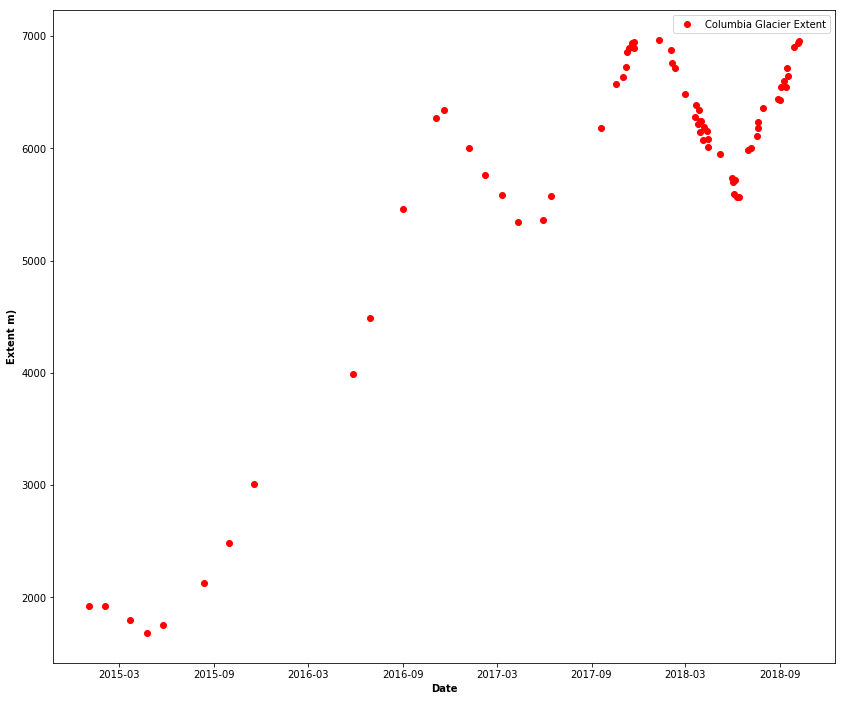

In [64]:
# set the start and end date of the plot
startYear = 2015
startMonth = 1
startDay = 1

endYear = 2019
endMonth = 12
endDay = 31


#plot the timeseries
import matplotlib.pyplot as plt
import numpy as np
xLabel = 'Date'
yLabel = 'Extent m)'
#yLabel = 'Extent (Million sq km)'

LegendLabel = 'Columbia Glacier Extent'

dates = x_axis#dataNHall['Year-Month-Day']
start = pd.datetime(startYear, startMonth, startDay) 
end = pd.datetime(endYear, endMonth, endDay) 

x = CG_data[(dates >= start) & (dates < end)][['YearMonthDay']]
y = CG_data[(dates >= start) & (dates < end)][['Average']]


plt.plot(x, y, 'ro', label=LegendLabel)
#plt.plot([1,2,3,4], [1,4,9,16], 'ro')

plt.xlabel(xLabel, fontweight='bold' )
plt.ylabel(yLabel, fontweight='bold')

#plt.title("Simple Plot")
plt.legend()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.show()

Wow, that looks great.
It would be interesting to also plot the extent for each transect line.

If we use sequential colours we can easily identify if one side of the glacier is retreatign faster or slower. So we can see the average position clearly we will plot that a different colour:

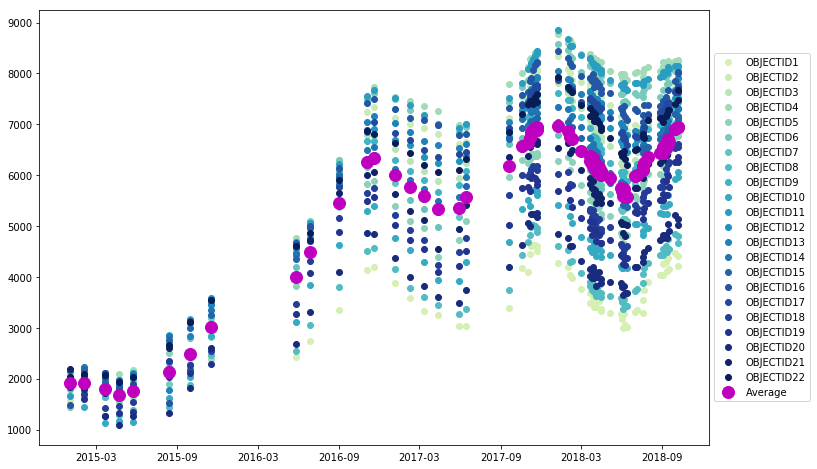

In [65]:
# set the start and end date of the plot
startYear = 2000
startMonth = 10
startDay = 1
endYear = 2018
endMonth = 10
endDay = 31

#number of transect lines
transecttotal = 23

#plot the timeseries
from matplotlib.pyplot import cm 
import matplotlib.pyplot as plt
import numpy as np
xLabel = 'Date'
yLabel = 'Extent m)'
#yLabel = 'Extent (Million sq km)'
LegendLabel = 'Columbia Glacier Extent'

dates = x_axis#dataNHall['Year-Month-Day']
start = pd.datetime(startYear, startMonth, startDay) 
end = pd.datetime(endYear, endMonth, endDay) 

x = CG_data[(dates >= start) & (dates < end)][['YearMonthDay']]

numberc = list(range(1,transecttotal,1))

color=iter(cm.YlGnBu(np.linspace(0.2,1,len(numberc))))
#color=iter(cm.YlGnBu(np.linspace(0.2,1,)))
    
#now do a foor loop for each transect line
x = CG_data[(dates >= start) & (dates < end)][['YearMonthDay']]

for n,transectotal in enumerate(numberc):
    n = n+1
    count = str(n)
    
    column = "OBJECTID"+count

    CG_data[column] = CG_data[column].astype('float64')
    y1 = CG_data[(dates >= start) & (dates < end)][[column]]
    c=next(color)    
    plt.plot(x, y1, 'ro', label=column, linewidth=1, color=c)

#plt.xlabel(xLabel, fontweight='bold' )
#plt.ylabel(yLabel, fontweight='bold')

#last plot average in magenta   
y = CG_data[(dates >= start) & (dates < end)][['Average']]

plt.plot(x, y, 'ro', label="Average", markersize=12, color='m')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()
#pandas.__version__

Nice.

Hopefully you cna see the benefits of Jupyter Notebooks, including the ability to pull in other packages such as pandas and matplotlb.

We can also do much more, for example ordering the data.....

In [66]:
sorted_data = CG_data.sort_values('Average')

#sorted_data.head()
sorted_data.tail()

OBJECTID          Name    OBJECTID1   OBJECTID10   OBJECTID11  \
5          6  S2V_18112017  4630.522015  5703.997334  8345.891727   
40        41  S2V_07102018  4214.365271  5957.182967  8144.747058   
6          7  S2V_23112017  4603.682075  5680.695651  8402.552909   
69        70  PSL_08102018  4406.428442  6062.623705  8155.055450   
64        65  PSL_09012018  4271.819578  5419.326037  8859.657784   

     OBJECTID12   OBJECTID13   OBJECTID14   OBJECTID15   OBJECTID16  \
5   7649.965258  7861.346135  7297.341092  7112.679008  8170.913419   
40  7618.107755  7908.562394  7292.407520  7111.521603  8018.910120   
6   7577.153360  7937.229767  7354.215268  7132.751766  8232.326105   
69  7522.925472  7784.091170  7314.143177  7158.154595  8016.684895   
64  7915.030855  8052.487490  7339.383578  7045.907257  8434.220985   

        ...         OBJECTID7    OBJECTID8    OBJECTID9      Average  Year  \
5       ...       6874.988385  4993.511005  7428.138720  6933.682974  2017   
40      ...       7104.208882  4673.548114  7434.021675  6938.008182  2018   
6       ...       6908.980816  4970.874737  7458.353237  6944.021856  2017   
69      ...       7031.574894  4808.517228  7431.880258  6954.346809  2018   
64      ...       6790.039098  4606.608118  7605.811266  6963.283535  2018   

    Month  Day  Year-Month-Day  Day-Month-Year  YearMonthDay  
5      11   18      2017-11-18      18-11-2017    2017-11-18  
40     10   07      2018-10-07      07-10-2018    2018-10-07  
6      11   23      2017-11-23      23-11-2017    2017-11-23  
69     10   08      2018-10-08      08-10-2018    2018-10-08  
64     01   09      2018-01-09      09-01-2018    2018-01-09  

[5 rows x 32 columns]

We can also export our edited data frame to excel. We can include our new coloumns of dates so the spreadsheet can also be easily presented in excel.

In [67]:
CG_data.to_csv('Output.csv', index=False)


output_data = folder_path+"\\Columbia_Glacier_output.xls"

CG_data.to_excel(output_data, index=False)

### Conclusion

We have completed the batch processing task to produce a graph showing width average ice front and also the ice front retreat positions for each transect.

As a bonus feature we can produce graphs for date ranges of our choice. Hopefully by using Jupyrt Notebooks you have identified some of the other benefits:

**A tool for sharing research outputs including guided data tools for reproduction**
- Greatly increasing accessibility to our research

**Notebooks Lend themselves for learning and teaching:**
- Ability to include markdown text instructions
- Embed content and tutorials
- Code packages into a notebook yet can be run one line of code at a time
- Can call stand a lone python scripts if required

**Lend themselves for assessment:**
- Contain code as well as explanation / findings /conclusion
- Packages into a notebook
- Outputs including error messages can be included in submission
- Accessible and suitable for Geographers / spatial analysis
- integration with ArcPy (and the python API

Qu2. Which scripting environment might be more beneficial to use when executing the map layout script?
- ArcGIS python window
- An IDE like Jupyter, PyCharm or SPIDER

In [68]:
run answer2.py

Question2 :
Which scripting environment might be more beneficial to use when executing the map layout script?

Answer:
Because the scripting result will need to be viewed in ArcGIS, it may be more beneficial to execute this script in the Python window to see the layout changes as the script runs.


Qu3. Why is it important to use arcpy to rename shapefiles?
(Run the next cell for the answer)

In [69]:
run answer3.py

Question3 :
Why is it important to use arcpy to rename shapefiles?

Answer
Shapefiles have a .shp extension which stores the geometry for a feature comprising a set of vector coordinates. This always needs to be accompanied by an Index file (.shx extension) and a dBASE table (the .dbf extension) which stores the attribute data associated with spatial features. Additionally, a Shapefile can have a .prj part, which defines the projection. This is just a text file in the ‘well-known text’ format.
The accompanying files (.shx, .dbf, .prj) therefore also need to be renamed. The arcpy rename tool takes care of renaming all the associated/related shapefile files along with the SHP file.
